In [1]:
from hashlib import *
from pyblake2 import blake2b

In [2]:
import string
from random import choice,randint,seed
import numpy as np
from pyblake2 import blake2b

def hash_family(semilla=12345,k=100):
	"""
	Dado una semilla y un número k, 
	genera los salts (semilla en string)
	para generar k funciónes de hash blake2b
	"""
	seed(semilla)
	hash_salts = []
	for i in range(int(k)):
		min_char = 8
		max_char = 12
		allchar = string.ascii_letters + string.digits
		password = "".join(choice(allchar) for x in range(randint(min_char, max_char)))
		salt = password.encode()
		hash_salts.append(salt)

	return hash_salts


def hash_generator(elemento,salts,modulo_primo=526717,hyperloglog=False):
    """
    Recibe un elemento, y genera los hashes blake2b del elemento, se mapean a
    enteros y se les aplica módulo de un primo dado.
    Si hyperloglog es True, regresa un hash binario, uno solo.
    """
    elemento = elemento.encode() 
    
    if hyperloglog == True:
    	modulo_primo = 10000139
    	hashes = format(int(blake2b(elemento,salt=salts[0]).hexdigest()[:10],16) % modulo_primo,'023b') 
    else:
    	hashes = [int(blake2b(elemento,salt=salt).hexdigest()[:10],16) % modulo_primo\
	    for salt in salts]
    
    return hashes


class bloom_filter:
	"""
	Un bloom filter.
	
	Recibe los salts generados para loss hashes con blake2b y un primo, que es el largo del]
	vector de bits.
	"""     
	def __init__(self,salts,big_prime):
	    self.salts = salts
	    self.big_prime = big_prime
	    self.bits_vector = np.zeros(self.big_prime)

	def check_element(self,element):
		"""
		Checa, dado un elemento, 
		si este ya existe, si no, lo inserta.
		"""
		#generate hashes
		hashes = hash_generator(element,self.salts,self.big_prime)
		if self.bits_vector[hashes].sum() == len(hashes):
		    print('elemento {} ya esta en la lista'.format(element))
		    return 0
		else:
		    print('elemento {} no esta en la lista'.format(element))
		    #inserción en el filtro de bloom
		    self.bits_vector[hashes] = 1
		    return 1

In [3]:
salts = hash_family(k=100)
big_prime = 9003749
#genera vector	 de bits 
filtro_bloom = bloom_filter(salts,big_prime)

In [ ]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [19]:
import requests
import pandas as pd
flujo = pd.read_csv('../../flujo1.csv',header=None)
flujo.columns = ['nodo','mac','pot','fecha']
flujo.loc[:,'fecha'] = flujo['fecha'].str[:10]
flujo = flujo[['nodo','mac','fecha']].values.tolist()
elementos = ['-'.join(elemento) for elemento in flujo]
records = elementos[:100]
records2 = elementos[101:200]
records3 = elementos[201:300]
records4 = elementos[301:400]

In [29]:
for records in [records,records2,records3,records4]:
    r = requests.post('http://184.72.111.50:3000/insert_elements_bloom/', json= {'records':records})
    p = requests.post('http://184.72.111.50:3000/insert_elements_db/', json= {'records':records})
    print(r.json())
    print(p.json())

32 99
{'visitas_existentes': 67, 'nuevas_visitas': 32}
{'nuevas_visitas_base': 32, 'visitas_existentes_base': 67}
33 99
{'visitas_existentes': 82, 'nuevas_visitas': 17}
{'nuevas_visitas_base': 17, 'visitas_existentes_base': 82}
37 99
{'visitas_existentes': 82, 'nuevas_visitas': 17}
{'nuevas_visitas_base': 17, 'visitas_existentes_base': 82}
32 99
{'visitas_existentes': 99, 'nuevas_visitas': 0}
{'nuevas_visitas_base': 0, 'visitas_existentes_base': 99}


In [81]:
import hashlib

In [85]:
int(hashlib.sha256(b'perro').hexdigest()

65037262988508390320730743217786197372635231383109743382843559994223151666352

In [110]:
import requests
import pandas as pd
flujo = pd.read_csv('../../m1.csv',header=None)
flujo.columns = ['nodo','mac','pot','fecha']
flujo.loc[:,'fecha'] = flujo['fecha'].str[:10]
flujo = flujo[['mac','pot']].values.tolist()

def hash_bucket(elemento,salts,modulo_primo=4):
    """
    Recibe un elemento, y genera los hashes blake2b del elemento, se mapean a
    enteros y se les aplica módulo de un primo dado.
    Si hyperloglog es True, regresa un hash binario, uno solo.
    """
    elemento = elemento.encode() 
    
    hashes = [int(hashlib.sha256(elemento).hexdigest(),16) % modulo_primo\
              for salt in salts][0]
    
    return hashes

In [111]:
h = hash_family(semilla=1435142332524,k=1)
hash_bucket('holi',h)
hash_bucket('holiwi',h)

1

In [115]:
flujo[2]

['56:e6:e0:91:ce:d2', -79]

In [116]:
records = flujo[:10000]
cubetilla = []
cuentas = {'0':0,'1':0,'2':0,'3':0}
for record in records:
    cubeta = str(hash_bucket(record[0],h))
    if cubeta == '3':
        cubetilla.append(record[0])
    cuentas[cubeta] += 1
sd = requests.post('http://ec2-54-157-13-52.compute-1.amazonaws.com:3000/insert_elements_db_window/', json= {'records':records})
print(sd.json())
cuentas

{'hola': 'Has insertado 10000'}


{'0': 3193, '1': 2700, '2': 2347, '3': 1760}

In [117]:
set(cubetilla)

{'00:0a:f5:ef:12:2c',
 '00:1b:c7:fc:66:51',
 '00:27:15:bd:35:dc',
 '00:5a:13:13:a1:91',
 '00:87:01:c4:7b:3e',
 '00:88:65:bf:7e:8a',
 '00:95:69:97:f8:56',
 '00:ee:bd:92:10:f3',
 '02:3d:15:41:e3:f5',
 '02:44:5b:89:f8:f8',
 '02:4b:51:00:1e:28',
 '02:5c:60:c2:74:e5',
 '02:88:b6:1a:5d:5e',
 '02:96:46:91:a0:7d',
 '02:ac:6a:44:35:bb',
 '02:d8:cd:10:17:dc',
 '02:fb:e1:13:e0:39',
 '04:02:1f:97:89:fe',
 '04:1b:6d:b7:3c:db',
 '04:4b:ed:55:4c:03',
 '04:d6:aa:05:ed:43',
 '04:d6:aa:13:68:b2',
 '04:d6:aa:cf:94:a6',
 '06:6b:9c:a3:d1:55',
 '06:8f:b0:02:d8:39',
 '06:ed:e7:8d:6e:90',
 '08:ec:a9:94:72:a4',
 '0a:02:c6:8f:ec:cd',
 '0a:05:79:44:57:85',
 '0a:2d:cf:bf:69:32',
 '0a:6d:3f:4f:db:ce',
 '0a:b6:eb:04:b9:af',
 '0a:e5:cc:79:d4:9f',
 '0a:fd:c1:05:31:5e',
 '0c:30:21:cc:a0:33',
 '0c:8f:ff:08:08:38',
 '0c:8f:ff:9e:0d:c7',
 '0e:37:3a:42:99:ea',
 '0e:47:72:f2:94:05',
 '0e:75:b8:db:d9:1d',
 '10:30:47:1f:7f:61',
 '10:7b:44:33:f3:6c',
 '10:a5:d0:23:24:c1',
 '10:a5:d0:4d:86:48',
 '10:b1:f8:93:fb:c1',
 '12:45:31

In [139]:
import requests
import pandas as pd
flujo = pd.read_csv('../../f1_clean.csv',header=None)
flujo.columns = ['nodo','mac','pot','fecha']
flujo.loc[:,'dia'] = flujo['fecha'].str[:10]
flujo.loc[:,'fecha']= pd.to_datetime(flujo.fecha)
flujo['ts'] = flujo.fecha.values.astype(int) / 1000000000
#pd.to_datetime(flujo.ts,unit='s')

In [158]:
tabla = flujo.loc[flujo['dia'] == '2018-04-16'].groupby(['mac']).agg({'ts':['max','min']}).reset_index()

In [160]:
tabla.columns = ['mac','max','min']
tabla['tiempo'] = (tabla['max'] - tabla['min'])/60

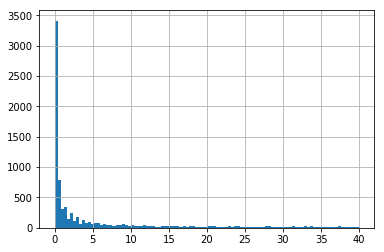

In [167]:
tabla.loc[(tabla['tiempo'] != 0) & (tabla['tiempo'] < 40)]['tiempo'].hist(bins=100)

In [ ]:
pos_connection.commit()

{'macs_existentes_filtro': 158,
 'nuevas_macs_filtro': 42,
 'visitas_existentes_base': 158}

Simulación de flujos 


In [ ]:


### Tenemos archivo. Insertaremos batches de 10000 lineas. 

##lee archivo. 

#obten los registros e insertalos en la base de datos.

    #deacuerdo a blo




